# PS1 - Hekmat Taherinejad

## Task 1:

In [1]:
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

### A-

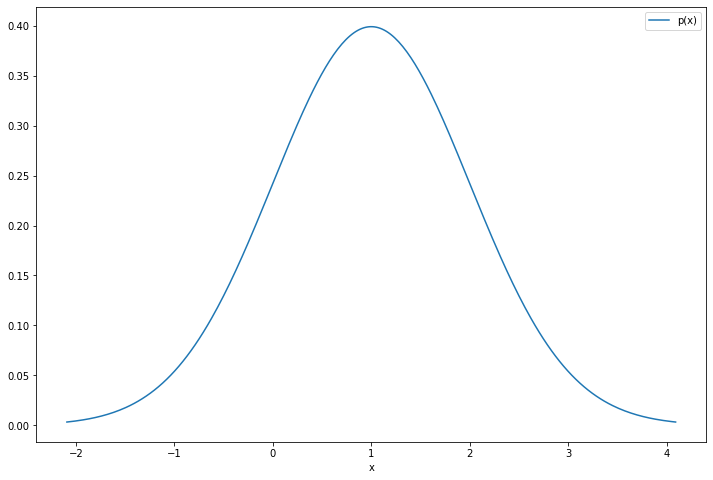

In [4]:
def Gaussian_plot(mu, cov, label):
    #fig, ax = plt.subplots(figsize=(6, 4))
    x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 300)
    ax.plot(x * cov + mu, norm.pdf(x) / cov , label=label)
    ax.set_xlabel("x")
    plt.legend() 
    
fig, ax = plt.subplots(figsize=(12, 8))
Gaussian_plot(1,1, label='p(x)')
plt.show()


### B-

$$p(x\leq0) = \int_{-\infty}^{0} p(x=x')d x'=cdf(0, 1, 1)$$

In [3]:
norm.cdf(0,1,1)

0.15865525393145707

### C-

### Bayes Theorem:

$$ p(x|z)= \frac{p(z|x).p(x)}{p(z)} = \frac{p(z|x).p(x)}{\int^{+\infty}_{-\infty}{p(z|x^{\prime})p(x^{\prime})}}= C (p(z|x).p(x)) $$

$$ p(z|x).p(x)= N(z;x,\sigma^2)\ N(x;1,1) $$

And:

$$  p(x|z) = C \frac{e^{-(x-\mu)^{2}/2\sigma^2}} {\sqrt{2\pi \sigma^2}} $$

Equating both sides we have: 

$$e^{-(x-\mu)^{2}/2\sigma^2} = e^{-(((z-x)^{2}/0.2)+(x-1)^{2})/2}$$ 

$$ => -(x-\mu)^{2}/2\sigma^2 = x^2 - 2 x + 1 + 5 x^2 - 10 x z + 5 z^2 = \frac{1}{6}(x^2 + \frac{10z+2}{6}x + ... $$

$$ => \mu = \frac{5z+1}{6} , {\sigma}^2 = \frac{1}{6}$$ 

$$ => p(x|z) = N (x; \frac{5z+1}{6} , \frac{1}{6}) $$


In [4]:
z=0.75

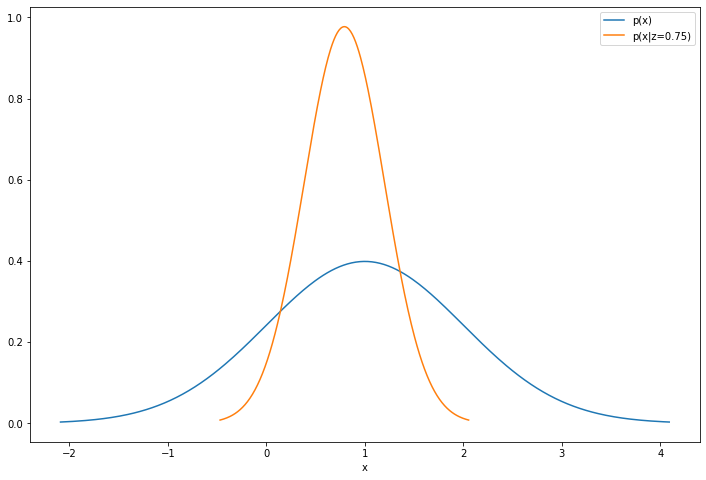

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
Gaussian_plot(1, 1, label='p(x)')
Gaussian_plot((1 + 5 * 0.75) / 6., np.sqrt(1 / 6.), label='p(x|z=0.75)')
plt.show()

### D-

$$ E\{x|z=0.75\}= \mu = \frac{(1 + 5 z)}{6} \approx 0.79 $$

In [6]:
(1 + 5 * 0.75) / 6

0.7916666666666666

### E-

In [6]:
def p(x, z):
    return norm.pdf(x, 1, 1) * norm.pdf(z, x, 0.2)

In [7]:
X, Y = np.meshgrid(np.linspace(-2, 4, 500), np.linspace(-2, 4, 500))
Z = p(X, Y)

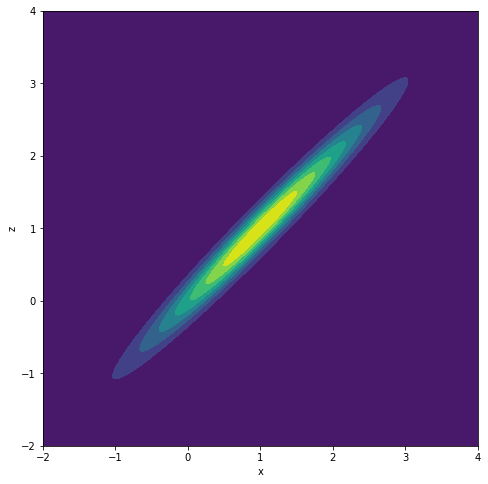

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.contourf(X, Y, Z)
ax.set_aspect('equal')
ax.set_xlabel("x")
ax.set_ylabel("z")
plt.show()

## Task 2:

### A-

In [9]:
def plot2dcov(mean, cov, k, label, **kwargs):
    #fig, ax = plt.subplots(figsize=(6, 4))
    L = scipy.linalg.cholesky(cov, lower=True)
    theta = np.linspace(0, 2 * np.pi, 100)
    points = np.array([k * np.cos(theta), k * np.sin(theta)]).T
    points = mean + points @ (L.T)
    ax.plot(points[:, 0], points[:, 1], label=label)
    ax.set_aspect('equal')
    plt.legend()

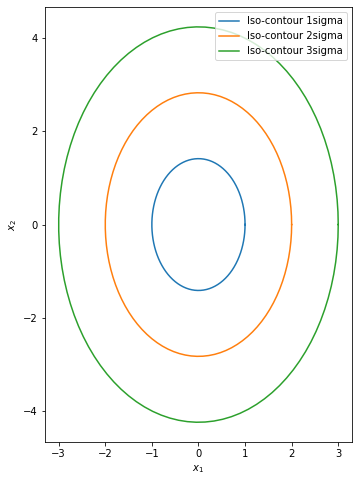

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(3):
    plot2dcov(np.array([0, 0]), np.array([[1, 0], [0, 2]]), i+1, 'Iso-contour '+str(i+1)+'sigma')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

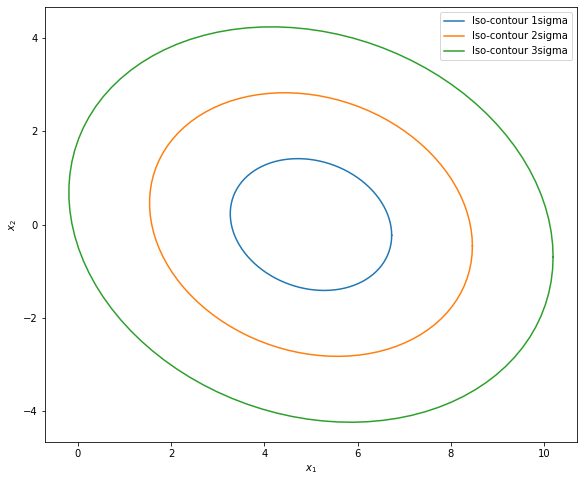

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(3):
    plot2dcov(np.array([5, 0]), np.array([[3, -0.4], [-0.4, 2]]), i+1,'Iso-contour '+str(i+1)+'sigma')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

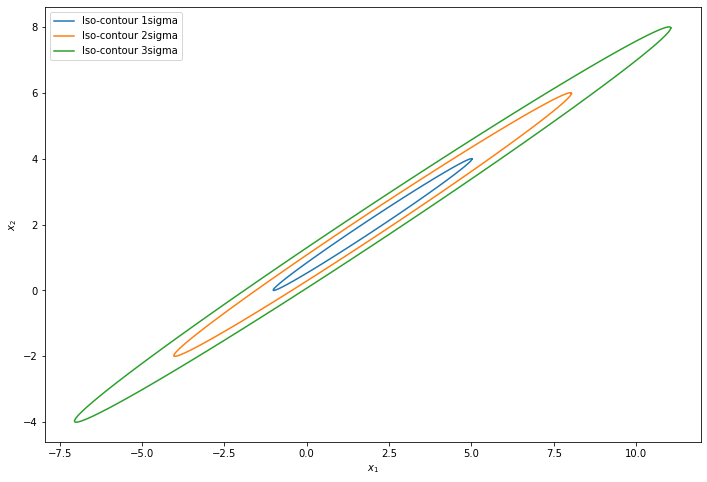

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(3):
    plot2dcov(np.array([2, 2]), np.array([[9.1, 6], [6, 4]]), i+1,'Iso-contour '+str(i+1)+'sigma')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

### B-

In [13]:
def Sample_mean(x):
    return np.mean(x, axis=0)

In [26]:
def Covariance(x):
    return ((x-Sample_mean(x)).T)@(x-Sample_mean(x))/(x.shape[0]-1)
    


### C-

In [25]:
def random_points(mean, cov, x):
    L = scipy.linalg.cholesky(cov, lower=True)
    
    return mean + x.dot(L.T)

x = np.random.normal(size=(2*(10**i), 3), )
Covariance(x)

array([[ 9.98195529e-01, -2.49111324e-03,  4.82847838e-04],
       [-2.49111324e-03,  1.00148784e+00, -1.94797988e-03],
       [ 4.82847838e-04, -1.94797988e-03,  9.94018423e-01]])

In [30]:
x = np.random.normal(size=(2*(10**i), 2), )
Covariance(x)

array([[ 9.96376892e-01, -6.22444580e-04],
       [-6.22444580e-04,  9.93870445e-01]])

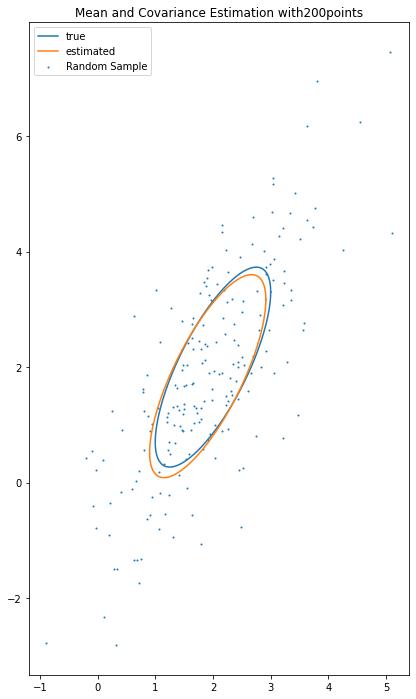

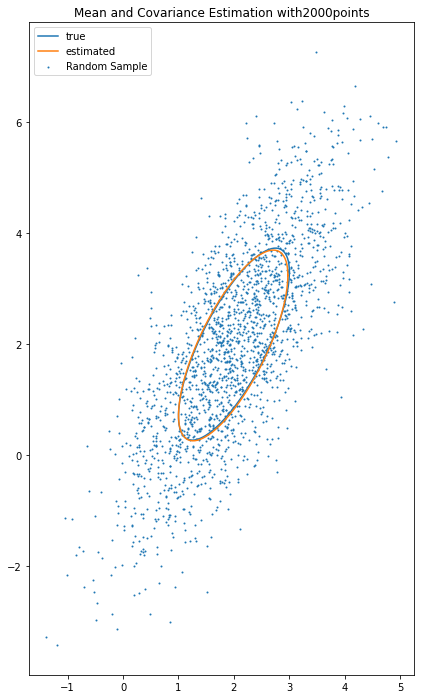

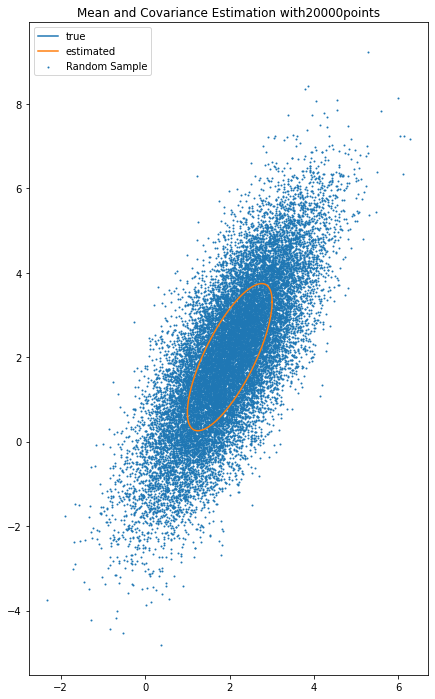

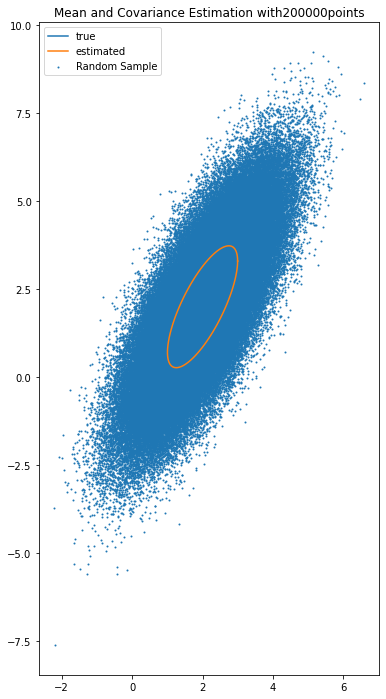

In [16]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])

for i in range(2,6):
    fig, ax = plt.subplots(figsize=(18, 12))
    x = np.random.normal(size=(2*(10**i), 2))
    points = random_points(mean, cov, x)
    plot2dcov(mean, cov, 1,'true', c="red")
    plot2dcov(Sample_mean(points), Covariance(points), 1,'estimated', c="green")
    ax.scatter(points[:, 0], points[:, 1], s=1, label='Random Sample')
    plt.title('Mean and Covariance Estimation with'+str(2*(10**i))+'points')
    plt.legend()
    plt.show()
    


#### Comment: 

We can say that the more samples we put to form the distribution, the estimated mean and covariance will get colser to the real mean and covariance.

## Task 3

### A-

We have prediction model as: 

$$ X_t = A X_{t-1} + B u_t + \varepsilon $$
$$ \bar{\mu_t} = A_t \mu_{t-1} + B_t u_t $$
$$\bar{\Sigma_t} = A_t \Sigma_{t-1} A_t^T + R $$

In [18]:
dt = 0.5

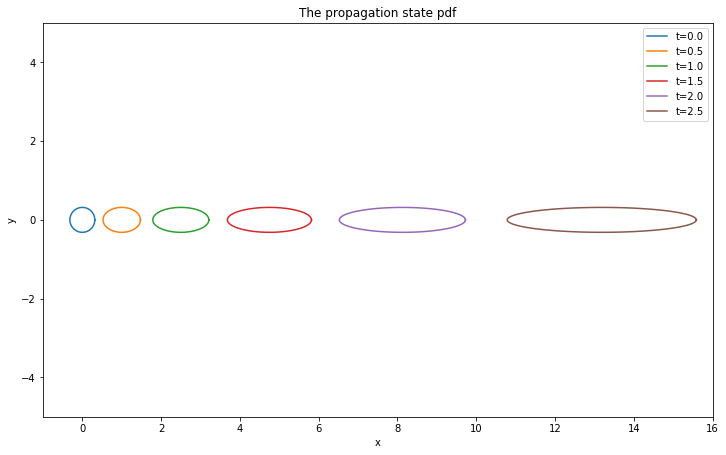

In [19]:
A = np.array([[1 + dt, 0], [0, 1]])
eps = np.array([2 * dt, 0])
mu = [np.array([0, 0])]
cov = [np.array([[0.1, 0], [0, 0.1]])] # pdf of the initial state
for i in range(5):
    mu.append(A.dot(mu[-1]) + eps)
    cov.append(A.dot(cov[-1].dot(A.T)))
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(-5, 5)
ax.set_xlim(-1, 16)
ax.set_title("The propagation state pdf")
for i in range(len(mu)):
    plot2dcov(mu[i], cov[i], 1, 't='+ str(i * dt))
plt.legend()
plt.show()

### B-

$$ x = A x + B u + \eta $$
$$ \mu_{t+1} = A \mu_t + B u_t =
  \left[ {\begin{array}{cc}
   \mu_x \\
   \mu_y \\
  \end{array} } \right] + 
  \left[ {\begin{array}{cc}
   \Delta t & 0 \\
   3 & \Delta t \\
  \end{array} } \right]\left[ {\begin{array}{cc}
   v_x \\
   v_y \\
  \end{array} } \right]$$
$$ \Sigma_{t+1}  = A \Sigma_t A^T + R_t = \left[ {\begin{array}{cc}
   \Sigma_{xx} & \Sigma_{xy} \\
   \Sigma{yx} & \Sigma_{yy} \\
  \end{array} } \right]\ + \left[ {\begin{array}{cc}
   0.1 & 0 \\
   0 & 0.1 \\
  \end{array} } \right]\ $$ 

### C-

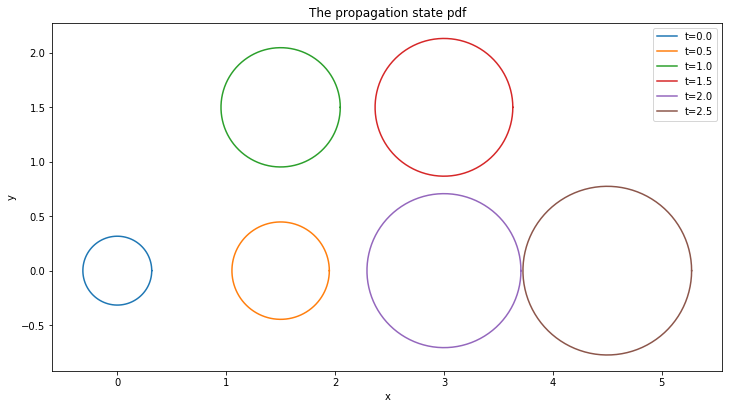

In [20]:
u_set = np.array([[3, 0], [0, 3], [3, 0], [0, -3], [3, 0]])
R = np.array([[0.1, 0], [0, 0.1]])
A = np.array([[1, 0], [0, 1]])
B = np.array([[dt, 0], [0, dt]])
mu = [np.array([0, 0])]
Sigma = [np.array([[0.1, 0], [0, 0.1]])]
for i in range(u_set.shape[0]):
    mu.append((A @ mu[-1]) + B @ u_set[i])
    Sigma.append(A.dot(Sigma[-1].dot(A.T)) + R)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("The propagation state pdf")
for i in range(len(mu)):
    plot2dcov(mu[i], Sigma[i], 1, 't='+ str(i * dt))
plt.legend()
plt.show()

### D- noise in state space

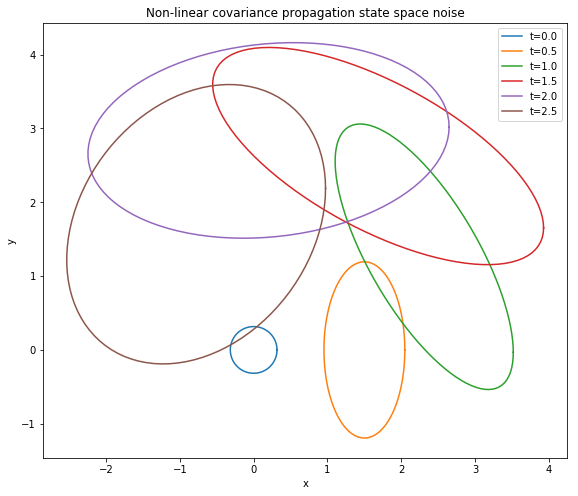

In [21]:
u = np.array([3, 2])
R = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]])
def Equation(X, U): # Jacobian ,see in lecture unicycle model
    return np.array([[1, 0, -np.sin(X[2]) * dt * U[0]], [0, 1, np.cos(X[2]) * dt * U[0]],[0, 0, 1]])
def AC(X): # Action Jacobian (V in lecture)
    return np.array([[np.cos(X[2]) * dt, 0], [np.sin(X[2]) * dt, 0], [0, dt]]) 
B = AC
mu = [np.array([0, 0, 0])]
Sigma = [np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])]
for i in range(u_set.shape[0]):
    mu.append(mu[-1] + B(mu[-1]).dot(u))
    Sigma.append(Equation(mu[-2], u).dot(Sigma[-1]).dot(Equation(mu[-2], u).T) + R) # GEG^T + R

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Non-linear covariance propagation state space noise")
for i in range(len(mu)):
    plot2dcov(mu[i][:2], Sigma[i][:2, :2], 1, 't='+ str(i * dt))
plt.legend()
plt.show()

### E- noise in action space

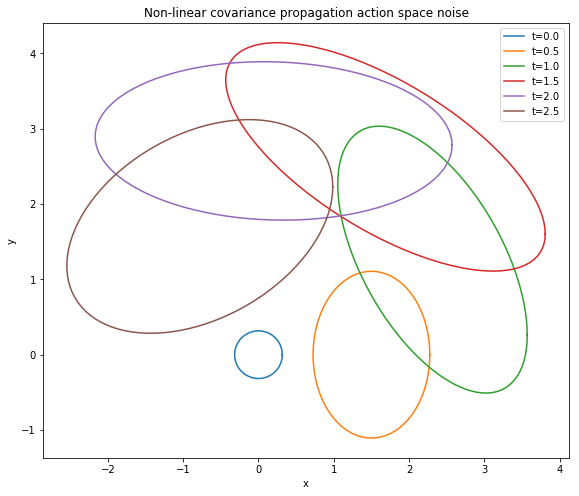

In [49]:
u = np.array([3, 2])
R1 = np.array([[2, 0], [0, 0.1]])
def Equation(X, U):
    return np.array([[1, 0, -np.sin(X[2]) * dt * U[0]], [0, 1, np.cos(X[2]) * dt * U[0]],[0, 0, 1]])
def AC(X):
    return np.array([[np.cos(X[2]) * dt, 0], [np.sin(X[2]) * dt, 0], [0, dt]])
mu = [np.array([0, 0, 0])]
Sigma = [np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])]

for i in range(u_set.shape[0]):
    mu.append(mu[-1] + AC(mu[-1]).dot(u))
    # GEG^T + VEV^T
    Sigma.append(Equation(mu[-2], u).dot(Sigma[-1]).dot(Equation(mu[-2], u).T) + AC(mu[-2]).dot(R1).dot(AC(mu[-2]).T))
    
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Non-linear covariance propagation action space noise")
for i in range(len(mu)):
    plot2dcov(mu[i][:2], Sigma[i][:2, :2], 1,'t='+ str(i * dt))
plt.legend()
plt.show()

#### Comment: 
It seems error in latest case is less and better propagation.